# import necessary python libraries to perform my tasks

In [36]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt


# Read the dataset using pandas

In [ ]:

data = pd.read_csv('solar_measurements_benin-malanville_qc_year2.csv', 
                 parse_dates=['Timestamp'], 
                 encoding='ISO-8859-1') 
print(data.info())
print(data.describe())


/var/folders/8d/kl24b_0s3gx0jhkqll61_jmm0000gn/T/ipykernel_35181/2796765360.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('dataset.csv',
/var/folders/8d/kl24b_0s3gx0jhkqll61_jmm0000gn/T/ipykernel_35181/2796765360.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('dataset.csv',


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525601 entries, 0 to 525600
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525601 non-null  object 
 1   GHI            525601 non-null  object 
 2   DNI            525601 non-null  object 
 3   DHI            525601 non-null  object 
 4   ModA           525601 non-null  object 
 5   ModB           525601 non-null  object 
 6   Tamb           525601 non-null  object 
 7   RH             525601 non-null  object 
 8   WS             525601 non-null  object 
 9   WSgust         525601 non-null  object 
 10  WSstdev        525601 non-null  object 
 11  WD             525601 non-null  object 
 12  WDstdev        525601 non-null  object 
 13  BP             525601 non-null  object 
 14  Cleaning       525601 non-null  object 
 15  Precipitation  525601 non-null  object 
 16  TModA          525601 non-null  object 
 17  TModB          525601 non-nul

# Calculate additional metrics (mean, median, variance, skewness) for key columns:

In [30]:
data.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,yyyy-mm-dd hh:mm,W/m²,W/m²,W/m²,W/m²,W/m²,°C,%,m/s,m/s,m/s,°N (to east),°,hPa,1 or 0,mm/min,°C,°C,NaN
1,2022-08-09 00:01,-5.6,-0.1,-5.7,0,0,23.1,98.3,0.9,1.3,0.5,115.3,4.8,996,0,0,23.5,22.9,NaN
2,2022-08-09 00:02,-5.5,-0.1,-5.6,0,0,23.1,98.3,0.9,1.1,0.4,117.8,5.5,996,0,0,23.5,22.9,NaN
3,2022-08-09 00:03,-5.5,-0.1,-5.6,0,0,23.2,98.4,0.1,1.1,0.3,105.4,0.9,996,0,0,23.5,22.9,NaN
4,2022-08-09 00:04,-5.5,-0.1,-5.6,0,0,23.2,98.4,0.1,1.1,0.4,103.7,2.2,996,0,0,23.5,22.9,NaN


drop the first row because not numerical values

In [33]:
df = data.iloc[1:]
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
1,2022-08-09 00:01,-5.6,-0.1,-5.7,0,0,23.1,98.3,0.9,1.3,0.5,115.3,4.8,996,0,0,23.5,22.9,NaN
2,2022-08-09 00:02,-5.5,-0.1,-5.6,0,0,23.1,98.3,0.9,1.1,0.4,117.8,5.5,996,0,0,23.5,22.9,NaN
3,2022-08-09 00:03,-5.5,-0.1,-5.6,0,0,23.2,98.4,0.1,1.1,0.3,105.4,0.9,996,0,0,23.5,22.9,NaN
4,2022-08-09 00:04,-5.5,-0.1,-5.6,0,0,23.2,98.4,0.1,1.1,0.4,103.7,2.2,996,0,0,23.5,22.9,NaN
5,2022-08-09 00:05,-5.5,-0.1,-5.7,0,0,23.2,98.4,0.5,1.6,0.6,94.1,4.8,996,0,0,23.6,22.9,NaN


In [34]:
# Convert numeric columns to proper data types if needed
numeric_columns = df.columns[1:]  # Exclude Timestamp
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Calculate summary statistics
summary_stats = df.describe()

# Display summary statistics
print(summary_stats)

/var/folders/8d/kl24b_0s3gx0jhkqll61_jmm0000gn/T/ipykernel_35181/1994286074.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')


                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      239.536629     170.156976     113.340359     236.835735   
std       331.563997     266.644811     156.440760     327.718231   
min       -16.400000      -6.300000     -16.100000       0.000000   
25%        -2.700000      -0.500000      -2.600000       0.000000   
50%         0.900000      -0.100000       0.900000       4.200000   
75%       480.600000     324.400000     214.700000     462.000000   
max      1454.000000     994.000000     806.000000    1399.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      229.144105      27.875447      58.111671       2.107215   
std       317.067317       6.209307      26.403998       1.640729   
min         0.000000      10.000000       4.200000       0.000000   
25%         0.000000      23.7000

# Data Quality Check

In [35]:
numeric_columns = df.columns[1:]  # Exclude Timestamp
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# 1. Check for missing values
missing_values = df.isnull().sum()

# 2. Check for negative values in GHI, DNI, and DHI (should only be positive)
negative_values = {
    col: df[df[col] < 0].shape[0] for col in ['GHI', 'DNI', 'DHI'] if col in df.columns
}

# 3. Check for outliers using the IQR method (for ModA, ModB, WS, WSgust)
def detect_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers.shape[0]

outlier_counts = {
    col: detect_outliers(col) for col in ['ModA', 'ModB', 'WS', 'WSgust'] if col in df.columns
}

# 4. Display results
print("Missing Values per Column:\n", missing_values)
print("\nNegative Values in GHI, DNI, and DHI:\n", negative_values)
print("\nOutlier Counts (IQR Method):\n", outlier_counts)

/var/folders/8d/kl24b_0s3gx0jhkqll61_jmm0000gn/T/ipykernel_35181/2962335929.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')


Missing Values per Column:
 Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

Negative Values in GHI, DNI, and DHI:
 {'GHI': 260363, 'DNI': 275879, 'DHI': 260338}

Outlier Counts (IQR Method):
 {'ModA': 226, 'ModB': 403, 'WS': 6088, 'WSgust': 6514}


/var/folders/8d/kl24b_0s3gx0jhkqll61_jmm0000gn/T/ipykernel_35181/73917860.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])  # Convert Timestamp to datetime
/var/folders/8d/kl24b_0s3gx0jhkqll61_jmm0000gn/T/ipykernel_35181/73917860.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df.index.month
/var/folders/8d/kl24b_0s3gx0jhkqll61_jmm0000gn/T/ipykernel_35181/73917860.py:9: FutureWarning: 'M' is deprecated and will be removed in a future ver

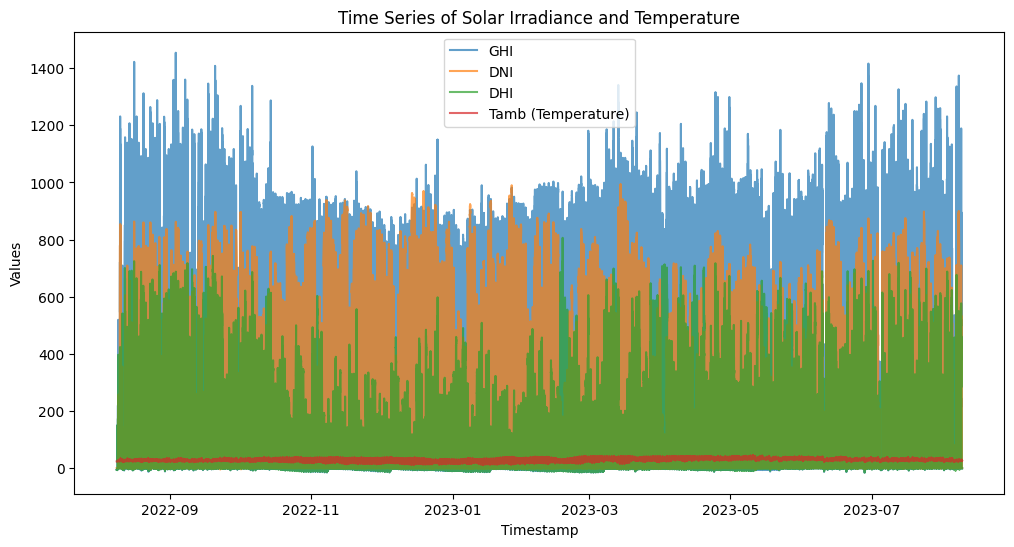

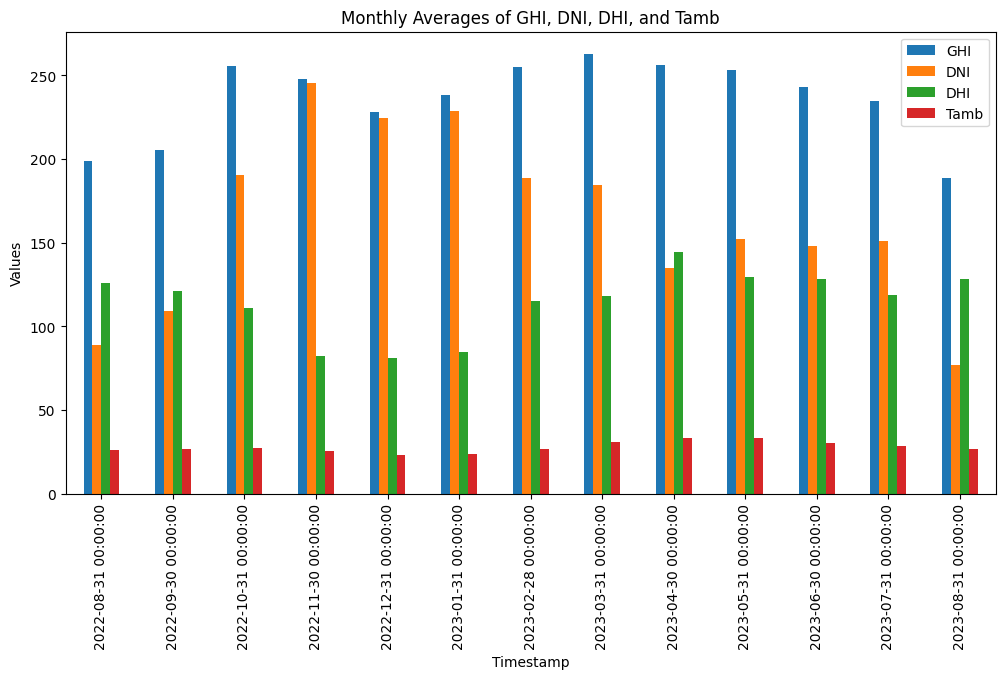

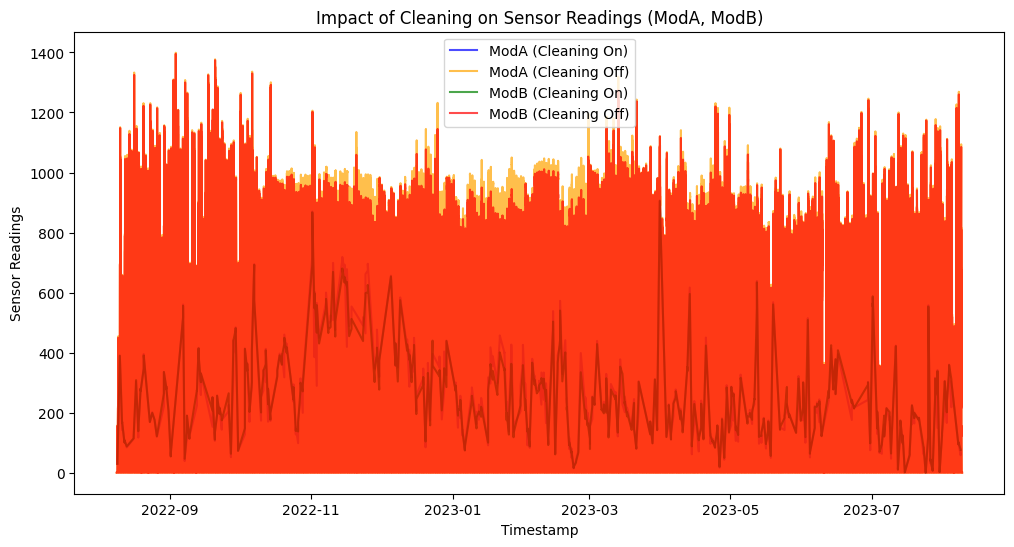

In [38]:


df.columns = ['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 
              'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 
              'Precipitation', 'TModA', 'TModB', 'Comments']
df['Timestamp'] = pd.to_datetime(df['Timestamp'])  # Convert Timestamp to datetime
df.set_index('Timestamp', inplace=True)

# Resample data to monthly and daily averages for high-level trends
df['Month'] = df.index.month
monthly_means = df.resample('M').mean()
daily_means = df.resample('D').mean()

# 1. Time Series Plots for GHI, DNI, DHI, and Tamb
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['GHI'], label='GHI', alpha=0.7)
plt.plot(df.index, df['DNI'], label='DNI', alpha=0.7)
plt.plot(df.index, df['DHI'], label='DHI', alpha=0.7)
plt.plot(df.index, df['Tamb'], label='Tamb (Temperature)', alpha=0.7)
plt.title('Time Series of Solar Irradiance and Temperature')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.legend()
plt.show()

# 2. Trends by Month: Bar Plot of Monthly Averages
monthly_means[['GHI', 'DNI', 'DHI', 'Tamb']].plot(
    kind='bar', figsize=(12, 6), title="Monthly Averages of GHI, DNI, DHI, and Tamb"
)
plt.ylabel('Values')
plt.show()

# 3. Cleaning Impact on Sensor Readings (ModA, ModB)
cleaning_on = df[df['Cleaning'] == 1]  # Filter rows with cleaning active
cleaning_off = df[df['Cleaning'] == 0]

plt.figure(figsize=(12, 6))
plt.plot(cleaning_on.index, cleaning_on['ModA'], label='ModA (Cleaning On)', color='blue', alpha=0.7)
plt.plot(cleaning_off.index, cleaning_off['ModA'], label='ModA (Cleaning Off)', color='orange', alpha=0.7)
plt.plot(cleaning_on.index, cleaning_on['ModB'], label='ModB (Cleaning On)', color='green', alpha=0.7)
plt.plot(cleaning_off.index, cleaning_off['ModB'], label='ModB (Cleaning Off)', color='red', alpha=0.7)
plt.title('Impact of Cleaning on Sensor Readings (ModA, ModB)')
plt.xlabel('Timestamp')
plt.ylabel('Sensor Readings')
plt.legend()
plt.show()
